# Sexual harassment cases per country and year

### USA
2015--> 368,921

2017 --> 363,393

2020 --> 298,628

### Argentina
2015--> 12,637

2017--> 10,552

2020--> 20,950

### Spain
2015--> 6,823 

2017--> 8,018

2020--> 10,798




#### Lets create a dataframe with our data

In [1]:
import pandas as pd

data = {'Country': ['U.S.', 'U.S.', 'U.S.', 'Argentina', 'Argentina', 'Argentina', 'Spain', 'Spain', 'Spain'],
        'Year': [2015, 2017, 2020]*3,
        'Sexual_Harassment_Cases': [368921, 363393, 298628, 12637, 10552, 20950, 6823, 8018, 10798]}
sh = pd.DataFrame(data)
sh


,Country,Year,Sexual_Harassment_Cases
0,U.S.,2015,368921
1,U.S.,2017,363393
2,U.S.,2020,298628
3,Argentina,2015,12637
4,Argentina,2017,10552
5,Argentina,2020,20950
6,Spain,2015,6823
7,Spain,2017,8018
8,Spain,2020,10798


## Import our social classes classification data

In [2]:
usa=pd.read_csv('/Users/mac/Desktop/TFG/data/code/classes/usaclass.csv')
arg=pd.read_csv('/Users/mac/Desktop/TFG/data/code/classes/arg.csv')
spain=pd.read_csv('/Users/mac/Desktop/TFG/data/code/classes/spain.csv')

Merge datasets

In [3]:
df = pd.concat([usa, arg, spain], ignore_index=True)
df['Country'] = pd.Series(['U.S.']*3 + ['Argentina']*3 + ['Spain']*3)
cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
df = df[cols]
df

,Country,Year,Lower_Class,Middle_Class,High_Class
0,U.S.,2015,30563,26623,12307
1,U.S.,2017,10149,25720,30883
2,U.S.,2020,30575,26911,6655
3,Argentina,2015,444,7915,10437
4,Argentina,2017,1504,1254,15719
5,Argentina,2020,272,8151,6019
6,Spain,2015,2628,8898,9938
7,Spain,2017,2621,8824,10035
8,Spain,2020,2093,7445,9130


In [4]:
df['Sexual_Harassment_Cases'] = data['Sexual_Harassment_Cases']
df

,Country,Year,Lower_Class,Middle_Class,High_Class,Sexual_Harassment_Cases
0,U.S.,2015,30563,26623,12307,368921
1,U.S.,2017,10149,25720,30883,363393
2,U.S.,2020,30575,26911,6655,298628
3,Argentina,2015,444,7915,10437,12637
4,Argentina,2017,1504,1254,15719,10552
5,Argentina,2020,272,8151,6019,20950
6,Spain,2015,2628,8898,9938,6823
7,Spain,2017,2621,8824,10035,8018
8,Spain,2020,2093,7445,9130,10798


## Check if we have a correlation between the social classes and the total number of sexual harassment cases

In [5]:
correlation_low_income = df["Lower_Class"].corr(df["Sexual_Harassment_Cases"])
correlation_middle_income = df["Middle_Class"].corr(df["Sexual_Harassment_Cases"])
correlation_high_income = df["High_Class"].corr(df["Sexual_Harassment_Cases"])
print("Correlation between Lower Class and Sexual Harassment Cases:", correlation_low_income)
print("Correlation between Middle Class and Sexual Harassment Cases:", correlation_middle_income)
print("Correlation between Higher Class and Sexual Harassment Cases:", correlation_high_income)

Correlation between Lower Class and Sexual Harassment Cases: 0.8494010311017456
Correlation between Middle Class and Sexual Harassment Cases: 0.9632857099122796
Correlation between Higher Class and Sexual Harassment Cases: 0.48014434481493035


We will now standardize our variables since our samples for each country were of different sizes and this may have affected the correlation

In [6]:
#Copy to standardize
stan=df.copy()

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
columns = ['Lower_Class', 'Middle_Class', 'High_Class', 'Sexual_Harassment_Cases']
stan[columns] = scaler.fit_transform(stan[columns])

In [8]:
correlation = stan.corr()
correlation

/var/folders/vj/crlt_wk5433clrm0qp9q9f3w0000gn/T/ipykernel_14598/3695328179.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = stan.corr()


,Year,Lower_Class,Middle_Class,High_Class,Sexual_Harassment_Cases
Year,1.000000,0.020971,0.000396,-0.282096,-0.052325
Lower_Class,0.020971,1.000000,0.872945,-0.004960,0.849401
Middle_Class,0.000396,0.872945,1.000000,0.324695,0.963286
High_Class,-0.282096,-0.004960,0.324695,1.000000,0.480144
Sexual_Harassment_Cases,-0.052325,0.849401,0.963286,0.480144,1.000000


Our results are the same than prior the standardization, lets now have a look at a heatmap for the correlation among sexual harassment and social classes

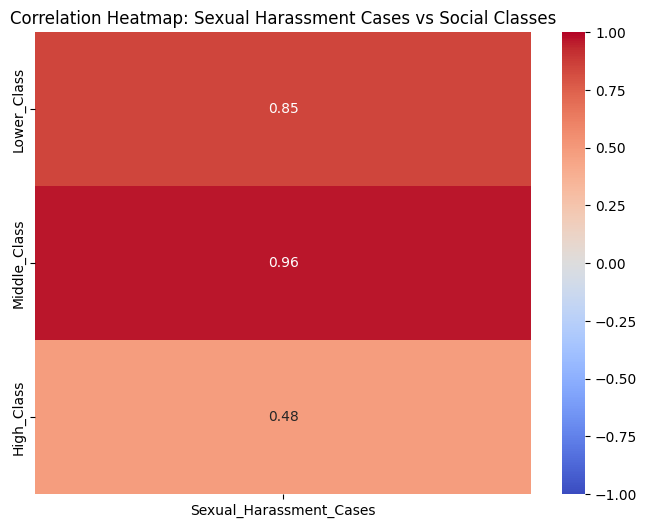

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
filtered_correlation = correlation.loc[
    ['Lower_Class', 'Middle_Class', 'High_Class'],
    ['Sexual_Harassment_Cases']
]
plt.figure(figsize=(8, 6))
sns.heatmap(filtered_correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap: Sexual Harassment Cases vs Social Classes')
plt.show()

Lets now have a look at the relationship between the different years studied and the number of sexual harassment cases

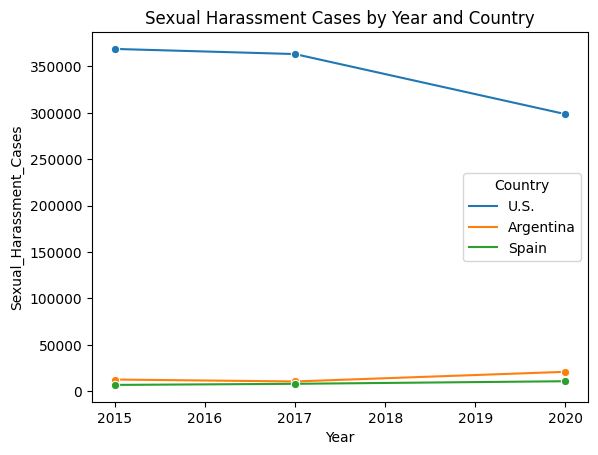

In [10]:
#Line plot
sns.lineplot(df, x='Year', y='Sexual_Harassment_Cases', hue='Country', marker='o')
plt.title('Sexual Harassment Cases by Year and Country')
plt.show()

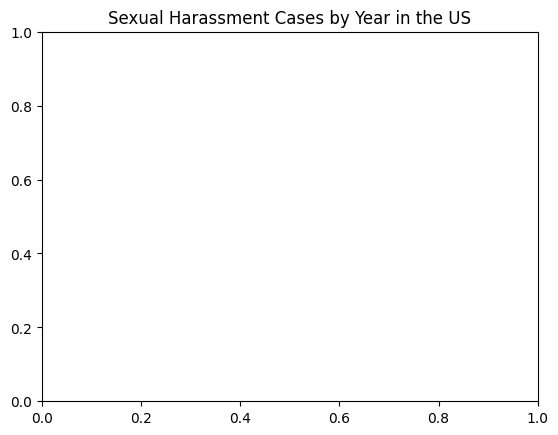

In [11]:
#Closer look at USA
sns.lineplot(df[df['Country']=='USA'], x='Year', y='Sexual_Harassment_Cases', marker='o')
plt.title('Sexual Harassment Cases by Year in the US')
plt.show()

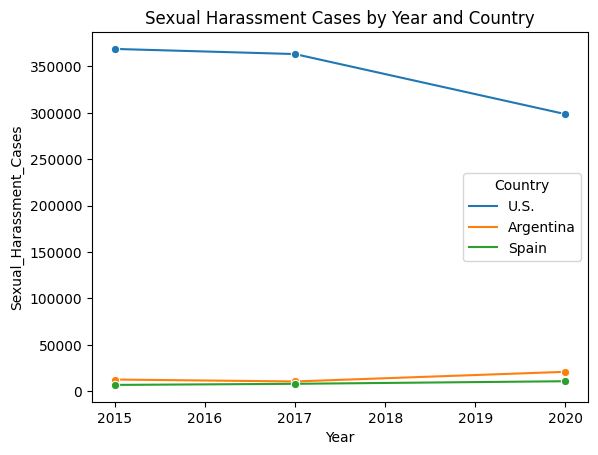

In [12]:
#Look only at Argentina and Spain
sns.lineplot(df[df['Country'] != 'USA'], x='Year', y='Sexual_Harassment_Cases', hue='Country', marker='o')
plt.title('Sexual Harassment Cases by Year and Country')
plt.show()

Lets make. abar chart to calculate the percentage of each social class by country to see the difference

/var/folders/vj/crlt_wk5433clrm0qp9q9f3w0000gn/T/ipykernel_14598/2710824279.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_melted, x='Year', y='Percentage', hue='Social_Class', ci=None, dodge=True, palette='viridis')


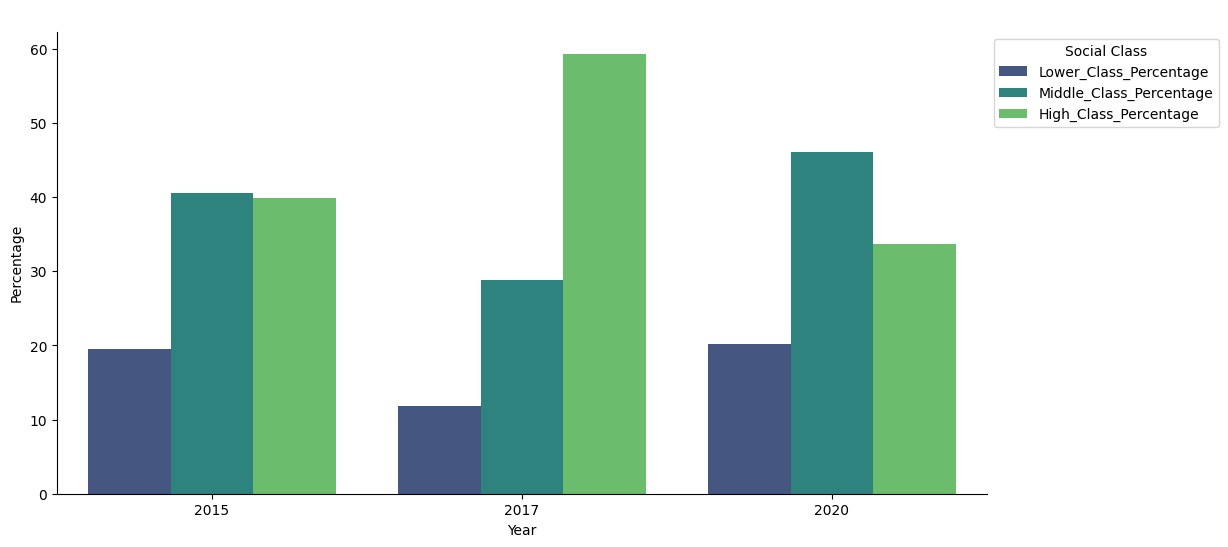

In [13]:
#Total population
df['Total_Population'] = df['Lower_Class'] + df['Middle_Class'] + df['High_Class']
# Percentage of each social class
df['Lower_Class_Percentage'] = df['Lower_Class'] / df['Total_Population'] * 100
df['Middle_Class_Percentage'] = df['Middle_Class'] / df['Total_Population'] * 100
df['High_Class_Percentage'] = df['High_Class'] / df['Total_Population'] * 100
df_melted = df.melt(id_vars=['Country', 'Year'], value_vars=['Lower_Class_Percentage', 'Middle_Class_Percentage', 'High_Class_Percentage'], var_name='Social_Class', value_name='Percentage')
plt.figure(figsize=(12, 6))
sns.barplot(data=df_melted, x='Year', y='Percentage', hue='Social_Class', ci=None, dodge=True, palette='viridis')
plt.title(' ')
plt.legend(title='Social Class', loc='upper left', bbox_to_anchor=(1, 1))
sns.despine()
plt.show()

/var/folders/vj/crlt_wk5433clrm0qp9q9f3w0000gn/T/ipykernel_14598/520397684.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_melted, x='Country', y='Percentage', hue='Social_Class', ci=None, dodge=True, palette='viridis')


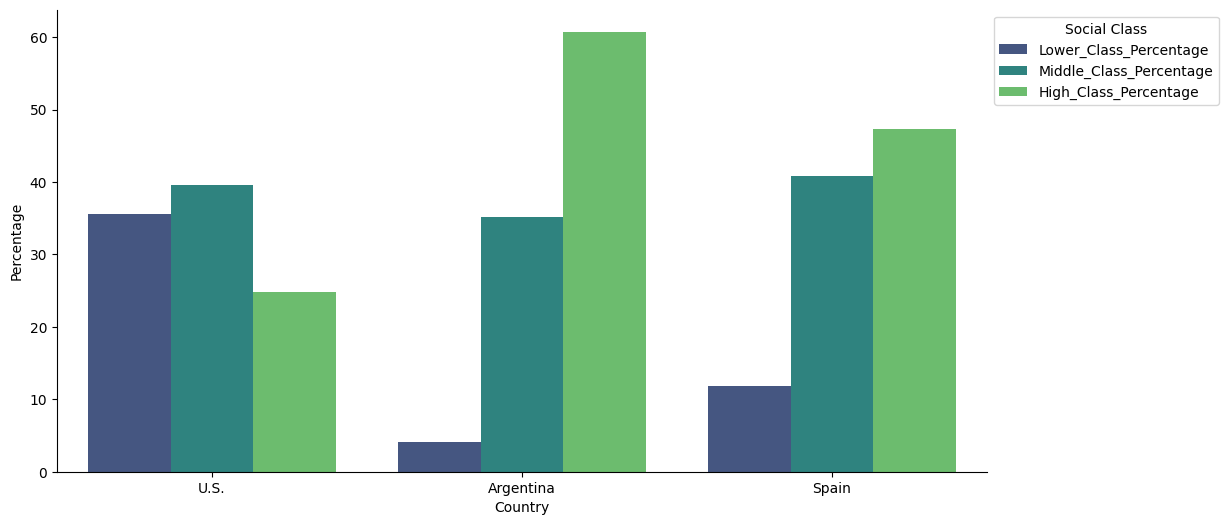

In [14]:
#Total population
df['Total_Population'] = df['Lower_Class'] + df['Middle_Class'] + df['High_Class']
# Percentage of each social class
df['Lower_Class_Percentage'] = df['Lower_Class'] / df['Total_Population'] * 100
df['Middle_Class_Percentage'] = df['Middle_Class'] / df['Total_Population'] * 100
df['High_Class_Percentage'] = df['High_Class'] / df['Total_Population'] * 100
df_melted = df.melt(id_vars=['Year', 'Country'], value_vars=['Lower_Class_Percentage', 'Middle_Class_Percentage', 'High_Class_Percentage'], var_name='Social_Class', value_name='Percentage')
plt.figure(figsize=(12, 6))
sns.barplot(data=df_melted, x='Country', y='Percentage', hue='Social_Class', ci=None, dodge=True, palette='viridis')
plt.title('')
plt.legend(title='Social Class', loc='upper left', bbox_to_anchor=(1, 1))
sns.despine()
plt.show()

In [15]:
total_Lower_Class = df.Lower_Class.sum()
print('total_Lower_Class: %s' % total_Lower_Class)
total_Middle_Class = df.Middle_Class.sum()
print('total_Middle_Class: %s' % total_Middle_Class)
total_High_Class = df.High_Class.sum()
print('total_High_Class: %s' % total_High_Class)

total_Lower_Class: 80849
total_Middle_Class: 121741
total_High_Class: 111123


In [16]:
sh

,Country,Year,Sexual_Harassment_Cases
0,U.S.,2015,368921
1,U.S.,2017,363393
2,U.S.,2020,298628
3,Argentina,2015,12637
4,Argentina,2017,10552
5,Argentina,2020,20950
6,Spain,2015,6823
7,Spain,2017,8018
8,Spain,2020,10798


In [17]:
# Calculate total cases by country
country_totals = sh.groupby('Country')['Sexual_Harassment_Cases'].sum().reset_index(name='Total_Cases')
df_merged = sh.merge(country_totals, on='Country')

# Calculate the percentage of cases for each year and country
df_merged['Percentage'] = (df_merged['Sexual_Harassment_Cases'] / df_merged['Total_Cases']) * 100

df_merged

,Country,Year,Sexual_Harassment_Cases,Total_Cases,Percentage
0,U.S.,2015,368921,1030942,35.784845
1,U.S.,2017,363393,1030942,35.248637
2,U.S.,2020,298628,1030942,28.966518
3,Argentina,2015,12637,44139,28.630010
4,Argentina,2017,10552,44139,23.906296
5,Argentina,2020,20950,44139,47.463694
6,Spain,2015,6823,25639,26.611802
7,Spain,2017,8018,25639,31.272671
8,Spain,2020,10798,25639,42.115527


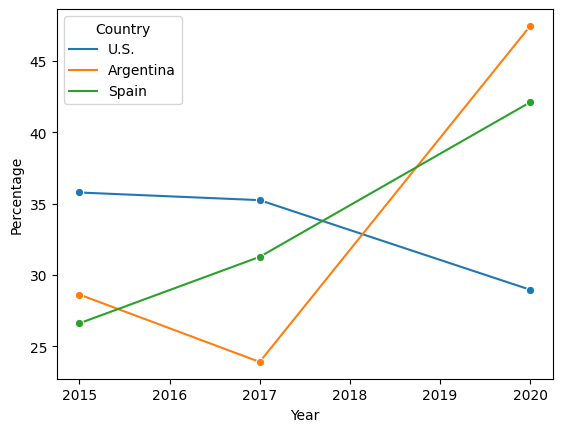

In [18]:
#Line plot for percentages
sns.lineplot(df_merged, x='Year', y='Percentage', hue='Country', marker='o')
plt.title('')
plt.show()

We will now see if we can observe a correlation withtin each country separetly

In [19]:
countries = ['U.S.', 'Argentina', 'Spain']

for country in countries:
    df_country = df[df['Country'] == country]
    
    correlation_low_income = df_country["Lower_Class"].corr(df_country["Sexual_Harassment_Cases"])
    correlation_middle_income = df_country["Middle_Class"].corr(df_country["Sexual_Harassment_Cases"])
    correlation_high_income = df_country["High_Class"].corr(df_country["Sexual_Harassment_Cases"])
    
    print(f"Correlations for {country}:")
    print("Correlation between Lower_Class and Sexual_Harassment_Cases:", correlation_low_income)
    print("Correlation between Middle_Class and Sexual_Harassment_Cases:", correlation_middle_income)
    print("Correlation between High_Class and Sexual_Harassment_Cases:", correlation_high_income)
    print("\n")


Correlations for U.S.:
Correlation between Lower_Class and Sexual_Harassment_Cases: -0.43796367403946007
Correlation between Middle_Class and Sexual_Harassment_Cases: -0.6339759987647752
Correlation between High_Class and Sexual_Harassment_Cases: 0.6269740130443399


Correlations for Argentina:
Correlation between Lower_Class and Sexual_Harassment_Cases: -0.7469843980383212
Correlation between Middle_Class and Sexual_Harassment_Cases: 0.6775306746136358
Correlation between High_Class and Sexual_Harassment_Cases: -0.9270542627979794


Correlations for Spain:
Correlation between Lower_Class and Sexual_Harassment_Cases: -0.9594020272867766
Correlation between Middle_Class and Sexual_Harassment_Cases: -0.9683908032777493
Correlation between High_Class and Sexual_Harassment_Cases: -0.9229606407007043




## Linear Regression

In [28]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
DV = 'Sexual_Harassment_Cases'
IV = ['Lower_Class', 'Middle_Class','High_Class']
X = df[IV]
y = df[DV]
model = LinearRegression().fit(X, y)
r2 = r2_score(y, model.predict(X))
print(f"Intercept: {model.intercept_}")
print("Coefficients:")
for variable, coefficient in zip(IV, model.coef_):
    print(f"{variable}: {coefficient}")
print(f"R-squared: {r2}")

Intercept: -128105.11573376475
Coefficients:
Lower_Class: 5.725406404157157
Middle_Class: 8.094785401039402
High_Class: 7.246973081416474
R-squared: 0.9861441694953907


In [33]:
def pearsonr_ci(x,y,alpha=0.05):
    ''' calculate Pearson correlation along with the confidence interval using scipy and numpy
    Parameters
    ----------
    x, y : iterable object such as a list or np.array
      Input for correlation calculation
    alpha : float
      Significance level. 0.05 by default
    Returns
    -------
    r : float
      Pearson's correlation coefficient
    pval : float
      The corresponding p value
    lo, hi : float
      The lower and upper bound of confidence intervals
    '''

    r, p = stats.pearsonr(x,y)
    r_z = np.arctanh(r)
    se = 1/np.sqrt(x.size-3)
    z = stats.norm.ppf(1-alpha/2)
    lo_z, hi_z = r_z-z*se, r_z+z*se
    lo, hi = np.tanh((lo_z, hi_z))
    return r, p, lo, hi

In [38]:
import pandas as pd
import scipy.stats as stats

DV = 'Sexual_Harassment_Cases'
IV = ['Lower_Class', 'Middle_Class', 'High_Class']
X = df[IV]
y = df[DV]

for variable in IV:
    correlation_coefficient, p_value = stats.pearsonr(X[variable], y)
    print(f"Pearson correlation coefficient between {variable} and {DV}: {correlation_coefficient}, p-value: {p_value}")


Pearson correlation coefficient between Lower_Class and Sexual_Harassment_Cases: 0.8494010311017455, p-value: 0.0037545032029937643
Pearson correlation coefficient between Middle_Class and Sexual_Harassment_Cases: 0.9632857099122796, p-value: 3.012002063758812e-05
Pearson correlation coefficient between High_Class and Sexual_Harassment_Cases: 0.48014434481493007, p-value: 0.19082710585773235


In [39]:
import numpy as np
import scipy.stats as stats

DV = 'Sexual_Harassment_Cases'
IV = ['Lower_Class', 'Middle_Class', 'High_Class']
X = df[IV]
y = df[DV]

for variable in IV:
    x = X[variable]
    
    # Calculate Pearson correlation coefficient and p-value
    correlation_coefficient, p_value = stats.pearsonr(x, y)

    # Calculate the confidence interval using Fisher transformation
    z = np.arctanh(correlation_coefficient)
    z_margin_of_error = stats.norm.ppf(1 - (1 - 0.95) / 2) / np.sqrt(len(x) - 3)  # 95% confidence interval
    z_low = z - z_margin_of_error
    z_high = z + z_margin_of_error

    # Inverse Fisher transformation to get the confidence interval of the correlation coefficient
    correlation_coefficient_low = np.tanh(z_low)
    correlation_coefficient_high = np.tanh(z_high)

    print(f"Pearson correlation coefficient between {variable} and {DV}: {correlation_coefficient}")
    print(f"Confidence interval (95%): ({correlation_coefficient_low}, {correlation_coefficient_high})")


Pearson correlation coefficient between Lower_Class and Sexual_Harassment_Cases: 0.8494010311017455
Confidence interval (95%): (0.4250555872288304, 0.96766016155925)
Pearson correlation coefficient between Middle_Class and Sexual_Harassment_Cases: 0.9632857099122796
Confidence interval (95%): (0.8304089568473599, 0.9924795754576285)
Pearson correlation coefficient between High_Class and Sexual_Harassment_Cases: 0.48014434481493007
Confidence interval (95%): (-0.2701077911742744, 0.8676081322325133)
